In [1]:
# Import the packages and print their versions
import tensorflow as tf
import keras
import scikeras

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"SciKeras version: {scikeras.__version__}")


TensorFlow version: 2.15.0
Keras version: 2.15.0
SciKeras version: 0.11.0


In [2]:
#!pip uninstall scikeras keras tensorflow -y


In [3]:
#!pip install tensorflow==2.15.0 keras==2.15.0 scikeras==0.11.0

In [4]:
import pandas as pd
import io
from google.colab import files
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn import datasets

# Upload Dataset

In [5]:
# Check if Churn_Modelling1.csv is already uploaded, if so, no need to run this cell
# skip to the next cell
# this cell just loads the file into the folders on the left hand side
# uploaded = files.upload()

In [6]:
# loads the csv into a pandas dataframe, so we can clean it and transform it using pandas functions
df = pd.read_csv('Churn_Modelling1.csv')

In [7]:
# check to see the df is loaded properly
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Cleaning

In [8]:
# Drop columns that don't affect the target column
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [9]:
# look if the columns have been dropped
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [10]:
# encode the categorical features using the variable above
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


# Train, Test, Split



In [11]:
# Split into train/test:
train, test = train_test_split(df, test_size=0.2, random_state=22)

# Scale features

In [12]:
# get all df.column names except Exited
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']
features

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Male']

In [13]:
# check the status of data frames with these features
# Exited is still in the train dataframe but won't show here because we've only printed the columns in all_features
train[features]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3821,608,56,5,0.00,2,0,1,153810.41,False,True,False
6136,780,33,6,145580.61,1,1,1,154598.56,False,True,False
8161,588,31,4,99607.37,2,0,1,35877.03,False,False,True
655,498,25,8,121702.73,1,1,1,132210.49,True,False,True
2950,734,37,0,152760.24,1,1,1,48990.50,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4587,500,34,6,0.00,1,1,1,140268.45,False,False,False
6646,685,42,2,0.00,2,0,0,199992.48,False,True,False
5478,648,44,9,111369.79,2,1,1,91947.74,True,False,True
8548,517,46,4,0.00,1,1,0,22372.78,False,True,True


# Split features and target in train and test

In [14]:
#Split features and target in train and test
train_features = train[features]
train_target = train['Exited']
test_features = test[features]
test_target = test['Exited']

In [15]:
#check each dataset
train_features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3821,608,56,5,0.00,2,0,1,153810.41,False,True,False
6136,780,33,6,145580.61,1,1,1,154598.56,False,True,False
8161,588,31,4,99607.37,2,0,1,35877.03,False,False,True
655,498,25,8,121702.73,1,1,1,132210.49,True,False,True
2950,734,37,0,152760.24,1,1,1,48990.50,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4587,500,34,6,0.00,1,1,1,140268.45,False,False,False
6646,685,42,2,0.00,2,0,0,199992.48,False,True,False
5478,648,44,9,111369.79,2,1,1,91947.74,True,False,True
8548,517,46,4,0.00,1,1,0,22372.78,False,True,True


In [16]:
train_target

3821    0
6136    0
8161    0
655     0
2950    0
       ..
4587    0
6646    0
5478    0
8548    0
6276    1
Name: Exited, Length: 8000, dtype: int64

In [17]:
test_features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2077,569,34,6,144855.34,1,0,0,196555.32,False,True,False
9207,682,52,5,112670.48,1,1,0,21085.17,False,False,False
6755,812,38,3,127117.80,2,1,1,174822.74,False,True,True
6704,436,45,3,104339.11,2,1,1,183540.22,True,False,True
9528,739,34,9,0.00,1,1,0,60584.33,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
8656,660,31,1,84560.04,1,1,1,137784.25,False,True,True
9133,705,36,1,111629.29,1,1,1,21807.16,False,True,True
7566,574,36,4,77967.50,1,1,0,167066.95,False,True,True
3970,509,30,6,0.00,2,1,0,180598.86,False,False,True


In [18]:
test_target

2077    0
9207    1
6755    0
6704    1
9528    0
       ..
8656    0
9133    0
7566    1
3970    0
3602    0
Name: Exited, Length: 2000, dtype: int64

# Feed-Forward Neural Network Model

In [19]:
# figure out number of columns for input for variable input_shape
train_features.shape

(8000, 11)

In [20]:
# define the feed-forward neural network model using Keras:
# we import Keras first
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

# def nnet_model():
#   model = Sequential()
#   model.add(Dense(12, input_shape=(11,), activation='relu'))
#   model.add(Dense(8, activation='relu'))
#   model.add(Dense(1, activation='sigmoid'))
#   return model

# this was the code suggested by Gemini after error from the above function
def create_model(number_of_layers=1, number_of_nodes=8, activation_function='relu'):
    model = Sequential()
    model.add(InputLayer(input_shape=(train_features.shape[1],)))  # Assuming you have defined train_features elsewhere
    for _ in range(number_of_layers):
        model.add(Dense(number_of_nodes, activation=activation_function))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [21]:
# import KeraClassifier and GridSearch
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
# compile model
# the following code in this cell was the from module 8
# We've placed this inside the create_model function for readability, and to not repeat the code
# This was recommended by Gemini

# model = create_model()
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
# create KerasClassifer object, which is the model to use for GridSearch
model_opt = KerasClassifier(build_fn=create_model, verbose=0)


# GridSearch


In [24]:
# Define the hyperparameter grid
# param_grid = {
#     'number_of_layers': [1, 2, 3],
#     'number_of_nodes': [8, 16, 32],
#     'activation_function': ['relu', 'sigmoid', 'tanh']
# }

# Define the hyperparameter grid
param_grid = {
    'model__number_of_layers': [0, 1, 2, 3],
    'model__number_of_nodes': [0, 1, 2, 4, 8],
    'model__activation_function': ['relu', 'sigmoid', 'tanh']
}


In [25]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model_opt, param_grid=param_grid, cv=3, n_jobs=-1)

In [26]:
# Fit the GridSearchCV object to the training data
grid_result = grid_search.fit(train_features, train_target)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(

In [27]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.795000 using {'model__activation_function': 'tanh', 'model__number_of_layers': 2, 'model__number_of_nodes': 4}


In [37]:
# Create the model with the best parameters
model_with_best_parameters = create_model(number_of_layers=2, number_of_nodes=4, activation_function='tanh')

In [38]:
# convert input dataset to correct data type for evalatuion
train_features_float = np.array(train_features, dtype=np.float32)
train_target_float = np.array(train_target, dtype=np.float32)
test_features_float = np.array(test_features, dtype=np.float32)
test_target_float = np.array(test_target, dtype=np.float32)

In [39]:
# evaluate the keras model on the train set
_, accuracy = model_with_best_parameters.evaluate(train_features_float, train_target_float, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 79.49


In [40]:
# predictions on the test set
predictions = model_with_best_parameters.predict(test_features_float)
test['prediction_opt'] = predictions

63/63 [==============================] - 0s 2ms/step


In [41]:
# evaluate the keras model on the test set:
_, accuracy = model_with_best_parameters.evaluate(test_features_float, test_target_float, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 80.20


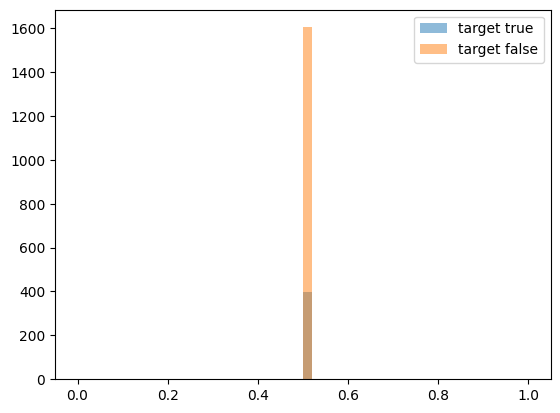

In [33]:
# Plot the predictions
plt.hist(test.loc[test_target==1, 'prediction_opt'], bins=50, alpha=0.5, label='target true')
plt.hist(test.loc[test_target==0, 'prediction_opt'], bins=50, alpha=0.5, label='target false')
plt.legend(loc='upper right')
plt.show()

In [34]:
# Convert predictions to binary
predictions_binary = (predictions > 0.5).astype(int)

In [35]:
# import f1_score
from sklearn.metrics import f1_score

In [36]:
# Compute F1 scores
print("F1 score for each class:", f1_score(test_target, predictions_binary, average=None))
print("Micro average F1 score:", f1_score(test_target, predictions_binary, average='micro'))
print("Macro average F1 score:", f1_score(test_target, predictions_binary, average='macro'))
print("Weighted average F1 score:", f1_score(test_target, predictions_binary, average='weighted'))

F1 score for each class: [0.89012209 0.        ]
Micro average F1 score: 0.802
Macro average F1 score: 0.44506104328523866
Weighted average F1 score: 0.7138779134295228
